Integrantes do grupo

* Alejandro Rabelo - RM 93606
* Cristian Alvaro Condori Paucara - RM 550509
* Diego Seiti Ogita Iacabo - RM 551289
* João Lucas Marques Costa - RM 98376
* Luiz Felipe Azevedo de Oliveira - RM 550348

Dataset utilizado: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

*OBS:* Se for utilizar o dataset baixado da página do link, mudar o nome do arquivo .csv para "BankChurners"

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [212]:
df = pd.read_csv('BankChurners.csv', sep=',')

# - **Análise Exploratória**

In [213]:
len(df)

10127

In [214]:
# Deletando as duas últimas colunas, como foi recomendado por quem disponibilizou o dataset

df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

In [215]:
# Deletando a coluna de número de cliente

df = df.drop('CLIENTNUM', axis=1)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [217]:
# Verificando os valores únicos das colunas categóricas

print(df['Attrition_Flag'].unique())
print(df['Gender'].unique())
print(df['Education_Level'].unique())
print(df['Marital_Status'].unique())
print(df['Income_Category'].unique())
print(df['Card_Category'].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [218]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [219]:
df.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [220]:
# Para contar a quantidade de entradas para cada valor de cada coluna categórica

colunas_categoricas = df.select_dtypes(include=['object']).columns

for i in colunas_categoricas:
    counts =df[i].value_counts()
    print(f"Contagem para {i}:")
    print(counts)
    print("//////////////////")

Contagem para Attrition_Flag:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
//////////////////
Contagem para Gender:
Gender
F    5358
M    4769
Name: count, dtype: int64
//////////////////
Contagem para Education_Level:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
//////////////////
Contagem para Marital_Status:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
//////////////////
Contagem para Income_Category:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
//////////////////
Contagem para Card_Category:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype:

# - **Gráficos**

In [221]:
num_cols = list(df.select_dtypes(include=['number']).columns)
cat_cols = list(df.select_dtypes("object"))

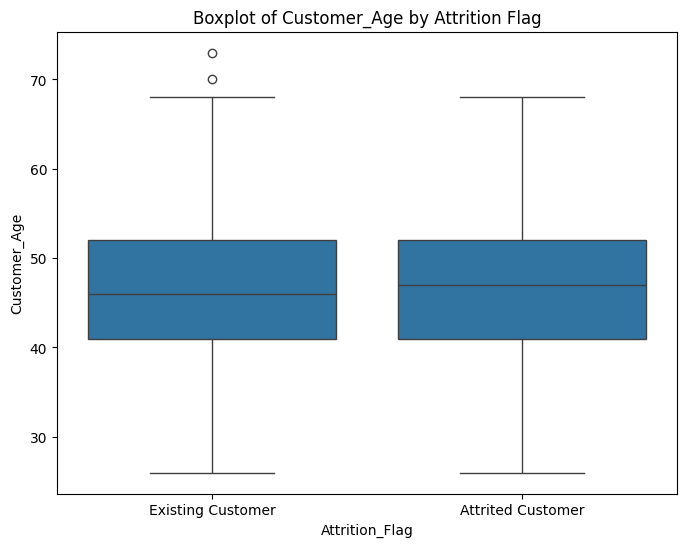

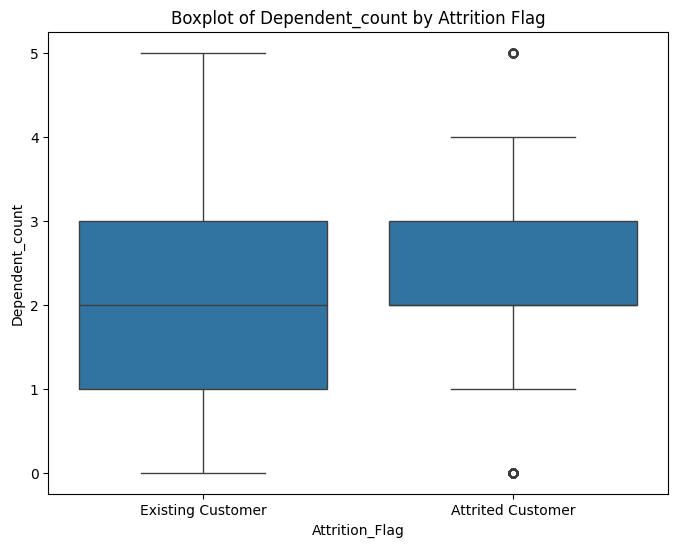

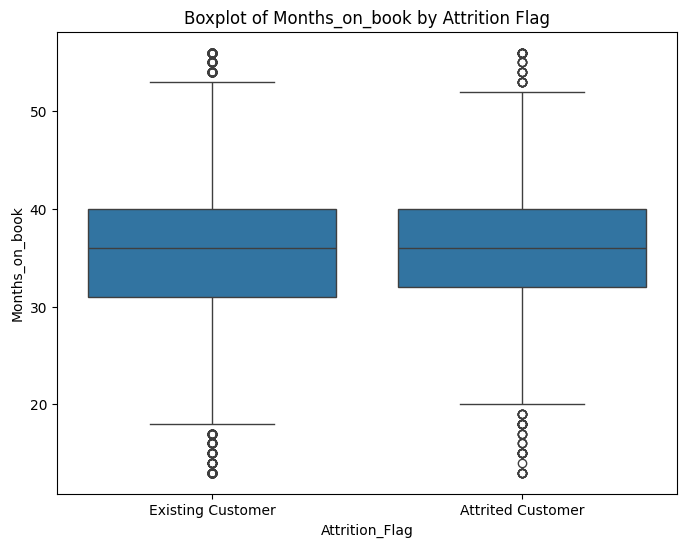

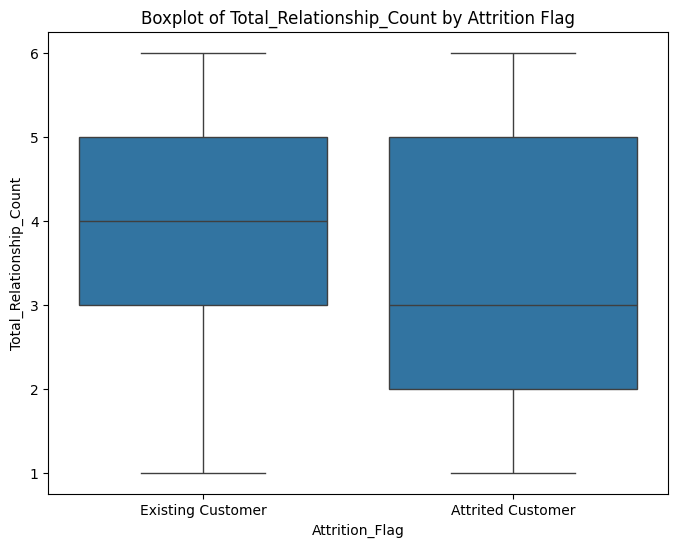

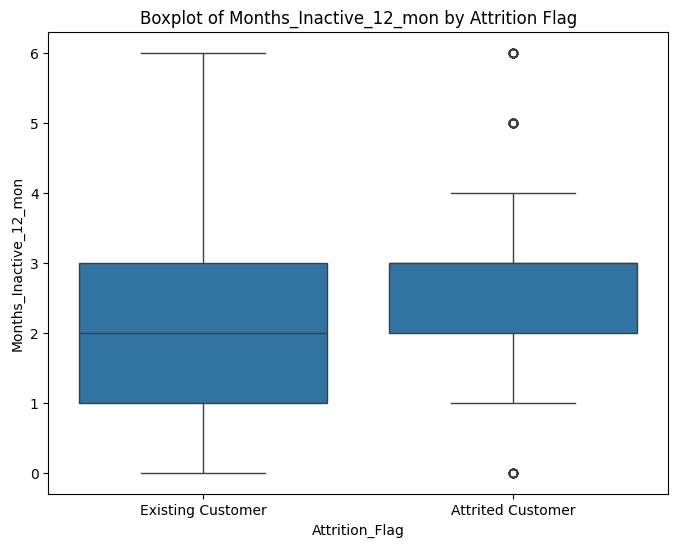

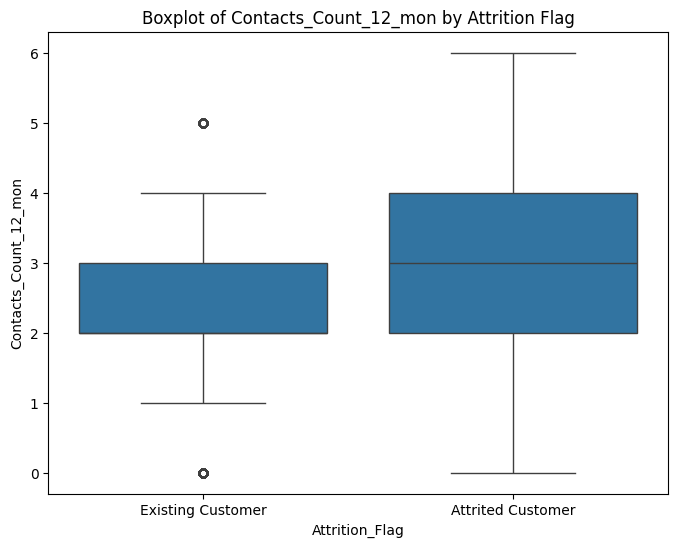

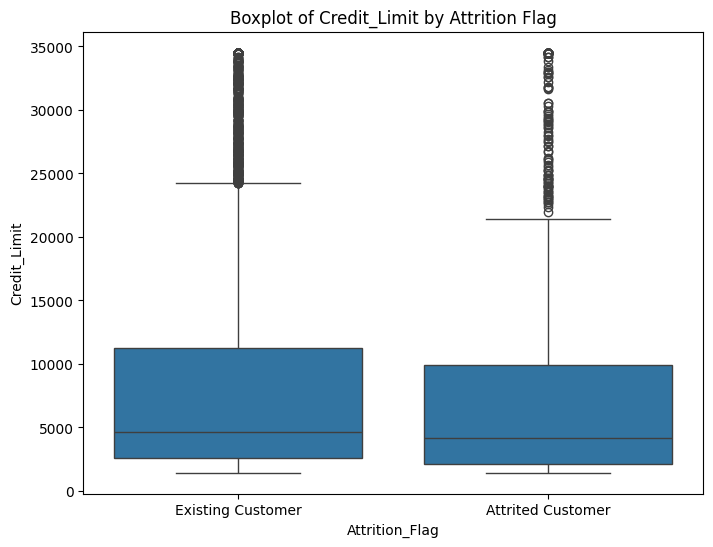

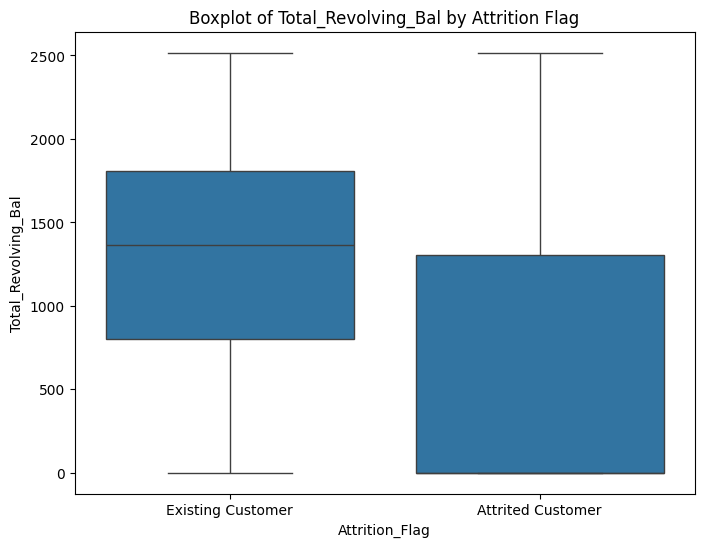

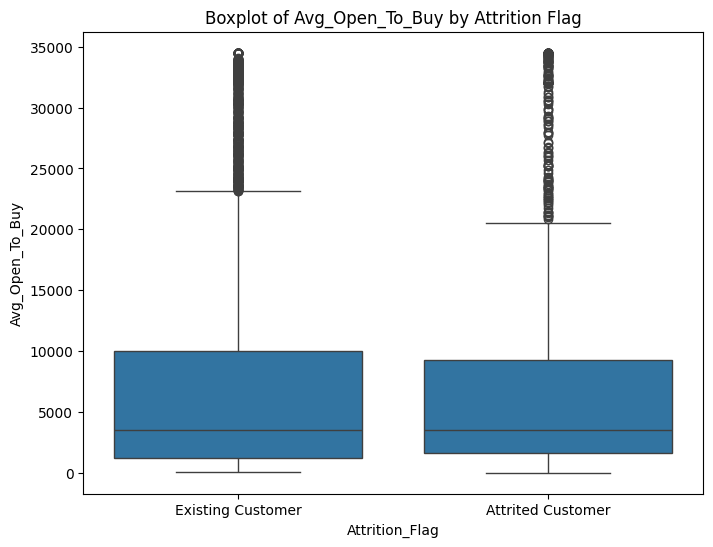

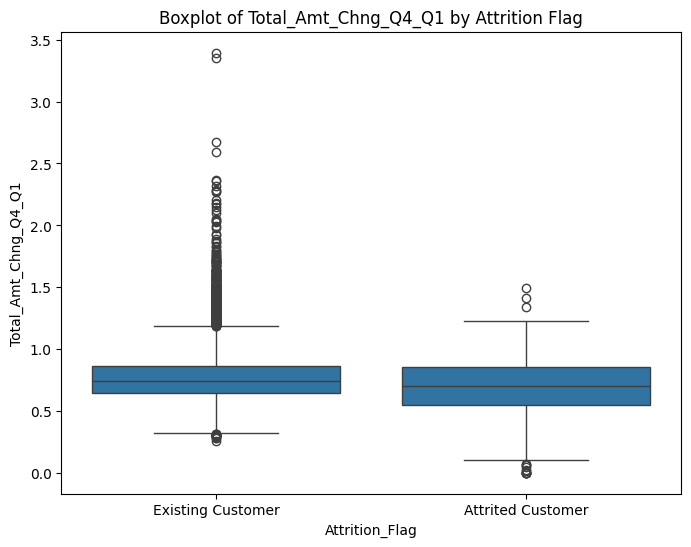

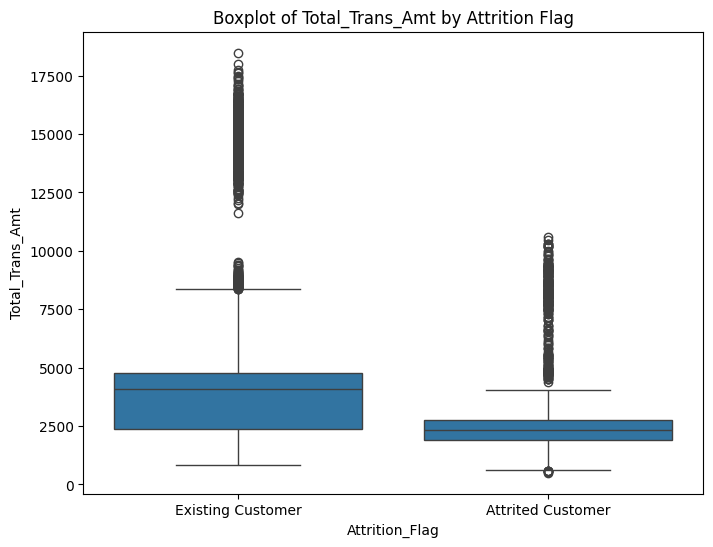

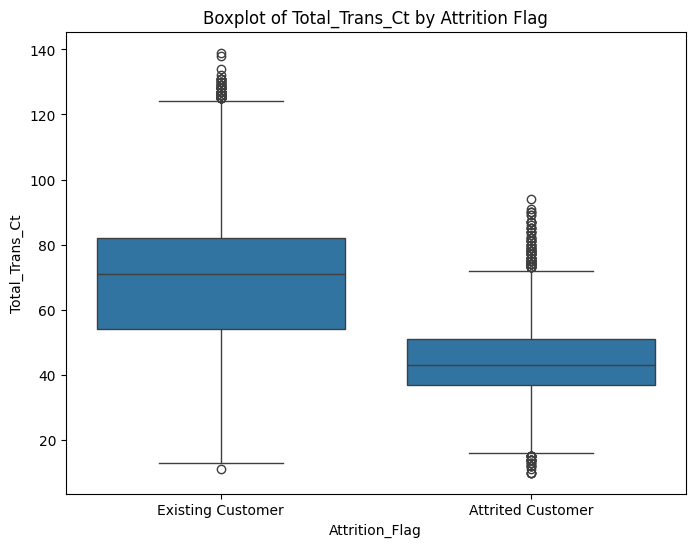

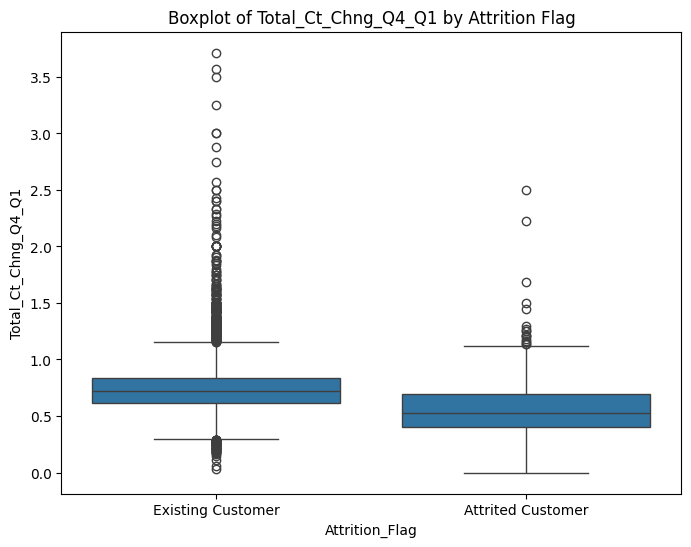

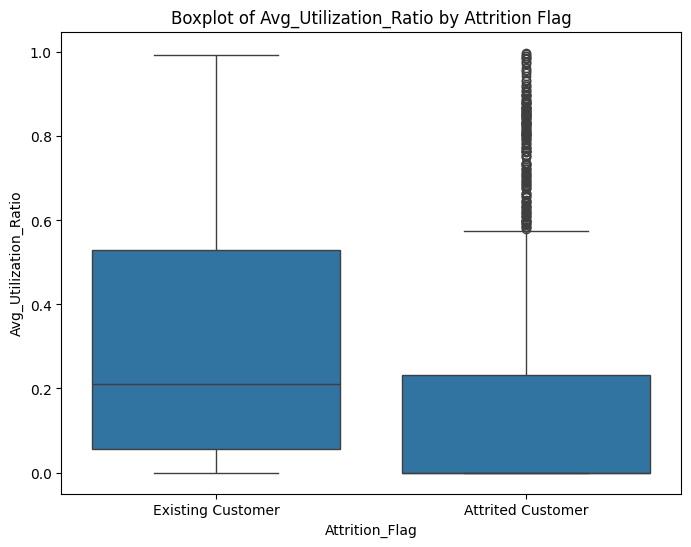

In [222]:
for col in num_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Attrition_Flag', y=col, data=df)
  plt.title(f'Boxplot of {col} by Attrition Flag')
  plt.show()


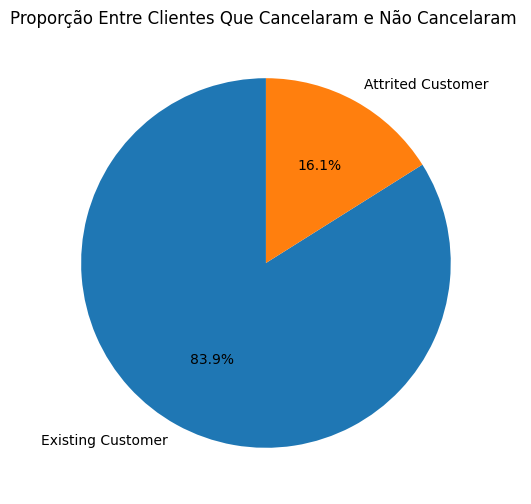

In [223]:
attrition_counts = df['Attrition_Flag'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção Entre Clientes Que Cancelaram e Não Cancelaram ')
plt.show()


**CONCLUSÃO:**
É possível perceber através do gráfico acima que há uma grande disparidade na quantidade de dados dos clientes que não cancelaram (quase 84% do dataset) para os que cancelaram. Logo, será preciso aplicar o SMOTE, uma técnica de oversampling (acrescenta dados nas classes minoritárias até ter equilíbrio entre os grupos da variável dependente) para tratar os dados desbalanceados.

In [224]:
# Transformando a coluna de Attrition_Flag (quem cancelou ou não) em uma coluna numérica

df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [225]:
# Dropando as colunas categóricas

categorical_columns = df.select_dtypes(include=['object']).columns
df = df.drop(columns=categorical_columns)


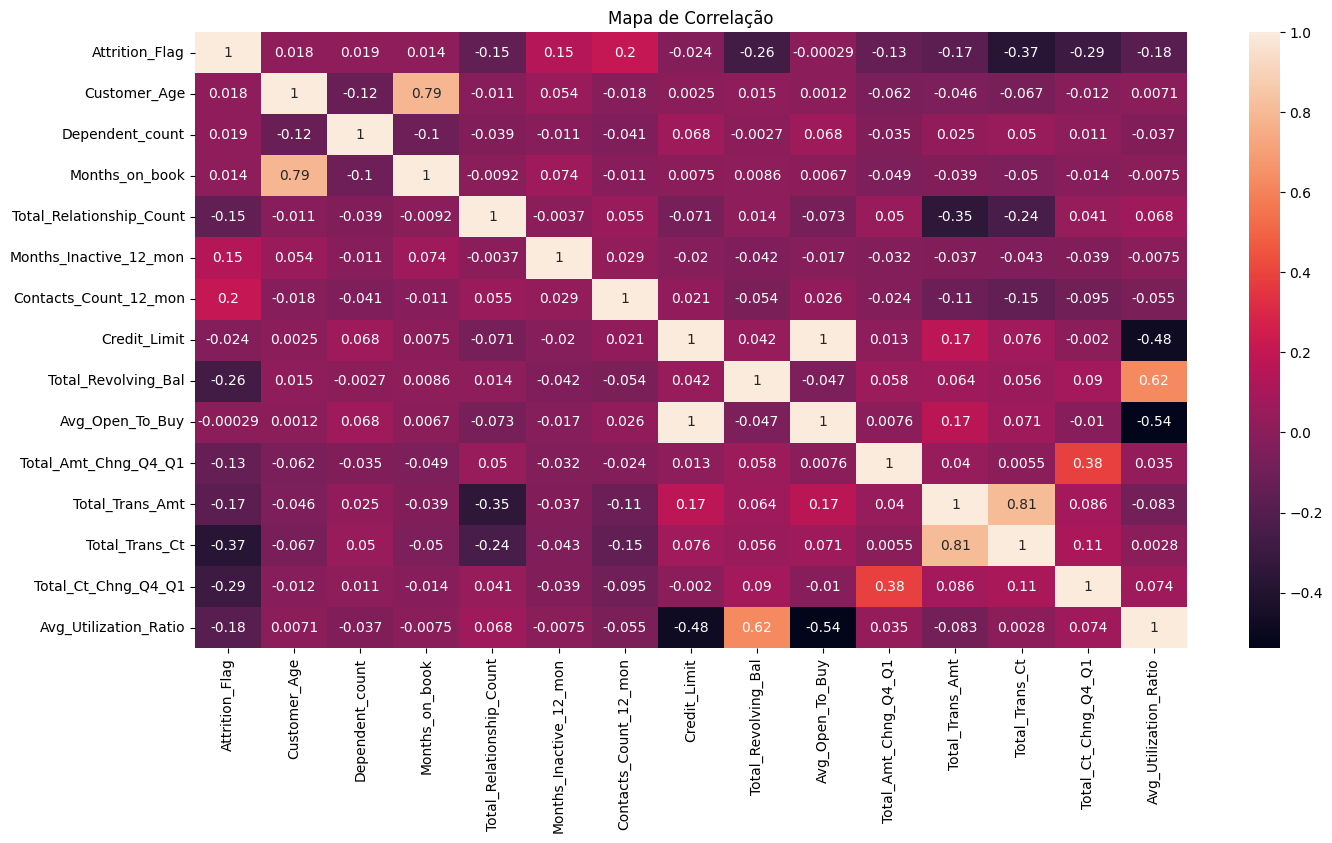

In [226]:
# Mapa de Correlação

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de Correlação')
plt.show()

# - **Criação do Modelo Preditivo**

In [227]:
df = pd.read_csv('BankChurners.csv', sep=',')

# Deletando a coluna de número de cliente
df = df.drop('CLIENTNUM', axis=1)

# Deletando as duas últimas colunas, como foi recomendado por quem disponibilizou o dataset
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

In [228]:
# Transformando a coluna de Attrition_Flag (quem cancelou ou não) em uma coluna numérica

df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [229]:
cat_cols = list(df.select_dtypes("object"))

In [230]:
# Criando variáveis dummy para as colunas categóricas

for col in cat_cols:
    dummy_cols = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df,dummy_cols],axis=1)
    df.drop(columns=col, inplace=True)

In [231]:
#Definindo as colunas de entrada e saída e divisão de conujuntos de treino e teste

y = df["Attrition_Flag"]
X = df.drop(columns=["Attrition_Flag"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# Normalizando os dados

req_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])

X_test = scaler.transform(X_test[req_cols])

In [233]:
# Aplicando a técnica SMOTE

sm = SMOTE(random_state = 69, sampling_strategy = 1.0)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [234]:
# Testando a acurácia do modelo

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_predicoes = rf.predict(X_test)

print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1699
           1       0.87      0.87      0.87       327

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [235]:
# Disponibilizando o modelo

with open('modelo_churn_prediction', 'wb') as f:
  pickle.dump(rf, f)